# PyPSA-Eur style power system plot

## Authored by F.Hofmann

The notebook reproduces the plot like a beautiful scheme of the
European Transmission System published in https://arxiv.org/abs/1806.01613.

In [1]:
#"""
#Created on Mon Sep 19 15:51:31 2022
#
#@author: fabian
#"""

In [2]:
import pypsa
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches

Two files are needed:
* PyPSA network file (e.g. "elec.nc" contain a lot of details and looks perfect)
* a country shape file (may by found in "resources/shapes/country_shapes.geojson")

In [3]:
country_code = "ag"
n = pypsa.Network("~/data_storage/" + country_code + "/networks/elec.nc")
regions_onshore = gpd.read_file("~/data_storage/" + country_code + "/resources/shapes/country_shapes.geojson")

INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads, storage_units, transformers


Define plot parameters:

In [4]:
bus_scale = 5e3 
line_scale = 3e3

~/opt/miniconda3/envs/pypsa-earth_test5/lib/python3.10/site-packages/pypsa/plot.py:259: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, ratio in ratios.iteritems():


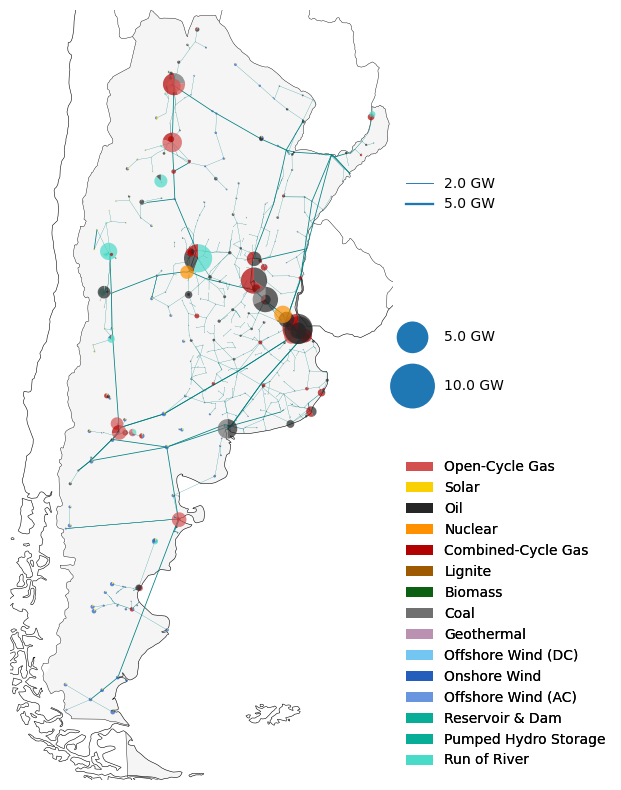

In [5]:

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(n.buses.x.mean())})
buses = n.generators.groupby(["bus", "carrier"]).p_nom.sum()

with plt.rc_context({"patch.linewidth": 0.}):
    n.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=n.lines.s_nom / line_scale,
        link_widths=n.links.p_nom / line_scale,
        line_colors="teal",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}
# circles legend may requite some fine-tuning
legend_circles_dict = {"bbox_to_anchor": (1, 0.6), "labelspacing": 2.5, **legend_kwargs}
bus_sizes = [5000, 10e3]  # in MW
line_sizes = [2000, 5000]  # in MW
add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,    
)
add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
)
add_legend_patches(
    ax,
    n.carriers.color,
    n.carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left"},
)
fig.tight_layout()
fig.savefig("brownfield_capacities_" + country_code + ".png", bbox_inches="tight", dpi=300)
